# LlamaIndex Doc Q&A Quickstart Demo

This notebook was based on the [Starter Tutorial](https://docs.llamaindex.ai/en/stable/getting_started/starter_example.html) in the official LlamaIndex documentation site that shows how easy it is to build a Generative AI app with Retrieval Augmented Generation (RAG) using LlamaIndex in just "5 lines of code".

The demo in this example is built with the [CassIO library](https://cassio.org/) to connect to [Astra vector DB](https://www.datastax.com/products/vector-search) -- a database-as-a-service running Apache Cassandra™ on the cloud.

## Prerequisites

1.   A running instance of Astra vector DB.
2.   An OpenAI API key.

Don't worry, creating an Astra vector DB is easy! All it takes is 5 clicks with no credit card required on the free tier. Just follow [the instructions here](https://docs.datastax.com/en/astra-serverless/docs/vector-search/chatbot-quickstart.html).

By default, LlamaIndex uses OpenAI's `gpt-3.5-turbo` model (LLM) and `text-embedding-ada-002` embedding model. Get an OpenAI API key by logging on to [platform.openai.com](https://platform.openai.com) then browse to [the API keys section of your profile](https://platform.openai.com/account/api-keys) to create a new key.

## Download data

This demo uses the text from Paul Graham's essay "[What I Worked On](http://paulgraham.com/worked.html)". Paul is a computer scientist recognised as an expert on Lisp, an author, and founder of the succesful venture capital fund Y Combinator among a long list of accomplishments.

Paul's essay is used in a lot of sample apps as it contains about 14,000 words, 700 sentences and nearly 200 paragraphs.

Download [the raw text version](https://raw.githubusercontent.com/run-llama/llama_index/main/examples/paul_graham_essay/data/paul_graham_essay.txt) and save it in the `data/` directory.

In [ ]:
! mkdir data
! curl https://raw.githubusercontent.com/run-llama/llama_index/main/examples/paul_graham_essay/data/paul_graham_essay.txt --output data/paul_graham_essay.txt

## Install libraries

In [ ]:
!pip install llama_index cassio openai

## Environment variables

Continue setting up the app with your credentials.

Note that your database ID can be found on the [Astra dashboard](https://astra.datastax.com):

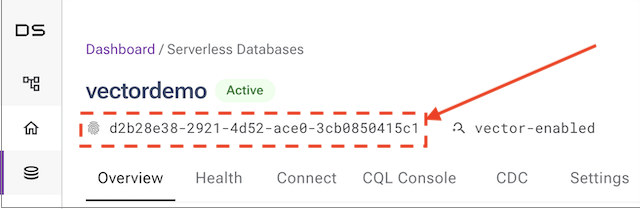

In [ ]:
from getpass import getpass
# Input your Astra DB token string, the one starting with "AstraCS:..."
ASTRA_DB_APP_TOKEN = getpass('Your Astra DB Token ("AstraCS:..."): ')

In [ ]:
# Input your database keyspace name:
ASTRA_DB_KEYSPACE = input('Your Astra DB Keyspace name (e.g. vectorks): ')

In [ ]:
# Input your database ID:
ASTRA_DB_ID = input('Your Astra DB ID (e.g. 1a2b34c5-...): ')

In [ ]:
import cassio
cassio.init(
    database_id=ASTRA_DB_ID,
    token=ASTRA_DB_APP_TOKEN,
    keyspace=ASTRA_DB_KEYSPACE,
)

Set OpenAI API key:

In [ ]:
# Input your OpenAI api key
OPENAI_API_KEY = getpass('Enter your OpenAI API key: ')

In [23]:
import openai
openai.api_key = OPENAI_API_KEY

## Load data and build index

This section reads the contents of the `data/` directory, loads them into LlamaIndex "document" objects, builds an index of the "documents", then stores them in your Astra vector DB in just 3 lines of code.

In [ ]:
from llama_index import VectorStoreIndex, SimpleDirectoryReader, StorageContext
from llama_index.vector_stores import CassandraVectorStore

storage_context = StorageContext.from_defaults(
    vector_store=CassandraVectorStore(
        table='llamastarter',
        embedding_dimension=1536,
        insertion_batch_size=15
    )
)

documents = SimpleDirectoryReader('data').load_data()
index = VectorStoreIndex.from_documents(documents, storage_context=storage_context)

## Query the data

Now that the data has been loaded and indexed, this creates a Q&A engine on the index so you can ask questions like:

*   What did the author do growing up?
*   Which places did the author talk about?
*   What did Paul work on at Interleaf?
*   When did Paul start working on a new version of Arc?

Try it!

In [ ]:
query_engine = index.as_query_engine()
response = query_engine.query("What did the author do growing up?")
print(response)